In [2]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from sympy.abc import x, y, t

# Introduction
In this notebook presentation, I will be covering the process of numerically approximating the graph of a damped harmonic oscillator using Euler's method.

A real-life example of a damped harmonic oscillator might be a spring with a weight attached at the end, expanding and contracting while submerged in some medium - whether that medium is air, water, or motor oil.
The thicker our chosen medium is, the faster our system should come to rest, as more energy is expended generating friction instead of becoming kinetic energy.

# Simple Harmonic Motion
To begin, let's consider how to model a simpler situation mathematically. I propose forming a function to represent the position of our mass as it oscillates over time, denoted as $x(t)$.  
To create this function, we must first define some constants for our system.  
Let:  
- **A** = amplitude 
    - The maximum displacement of our mass from its resting position  
- **T** = period 
    - The time required to complete a single cycle of our function  
- **w** = $\frac{2\pi}{T}$  
    - The period for sin and cos divided by the period for our specific function  

For now, we will use the standard equation for simple harmonic motion in terms of these variables as a basis for our calculations.  
From physics, we know that the equation for the position of a simple harmonic oscillator is $x(t) = A cos(w*t)$  
A graph of this function is shown below:  

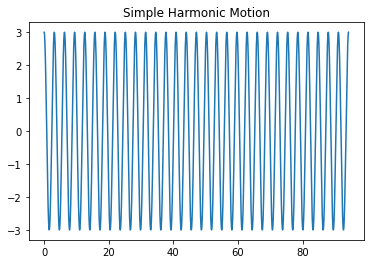

In [191]:
t = np.linspace(0, 30*np.pi, 4000)
A = 3
T = np.pi
f = 1/T
w = 2*np.pi * f
xt = A*np.cos(w*t)
plt.plot(t, xt)
plt.title('Simple Harmonic Motion')
plt.show()

# Introducing Dampness
### Hooke's Law & Newton's Laws
Now, let us consider some laws from physics that play an important in forming our more complex function:   

Newton's third law dictates that every action has an equal and opposite reaction. In our case, we can interpret this law as meaning that the sum of all forces acting within a closed system must sum to zero.  

Hooke's law dictates that, in a simple spring-mass system, the force of the spring acting on our mass is $F_{spring} = -kx$, where k is the spring constant and x represents the displacement of our mass from equilibrium.  
  
Additionally, Newton's first law states that the net sum of forces on an object, $\sum F = ma$.  
Since the only force acting on our object is the spring force, we see that:  
$\sum F = -kx = ma$, or, adding $kx$ to both sides:  
$ma(t) + kx(t) = 0$  
Note that $a(t) = x''(t)$  

This means that we're left with a first-order differential equation that we need to solve.  
Sparing the details, we find that the function $x(t)$ which solves this diff eq is $x(t) = Acos(wt)$, with $w = \sqrt{\frac{k}{m}}$ (As graphed above).  

### Finally Accounting for Damping Force
The above function, however, models the movement an undamped oscillating system - in the real world, there are pieces of the system that introduce drag, such as air resistance. We need to instead find a set of functions that allows us to understand what happens as we slow down & convert some of our energy into thermal energy via friction.  
  
Each medium that we might choose to run our system inside of has a proportionality constant, 'b', that tells us how strongly the medium resists movement, or how much kinetic energy is converted to thermal energy instead of movement.  
Furthermore, the faster our mass is moving, the higher the drag force. It so happens that the resistance to movement scales linearly with the velocity of our mass.  
  
As such, the $F_{drag} = -bv$.  

Adding this force into our previous equation, we see that $\sum F = -kx -bv = ma$.  
Rearranged, we get $ma(t) + bv(t) + kx(t) = 0$, where m, b, and k are all constants.  
Note that $v(t) = x'(t)$.  
  
Thus we're left with a second-degree ordinary differential equation: $mx''(t) + bx'(t) + kx(t) = 0$.  
Again, sparing the details, we find that a similar equation to that of an undamped system works here as well.  
## $x(t) = Ae^{\frac{-bt}{2m}}cos(w' * t) , w' = \sqrt{\frac{k}{m} - \frac{b^2}{4m^2}}$  
A graph of this function is shown below. Note that the amplitude of the function decreases logarithmically over time, eventually converging to zero.

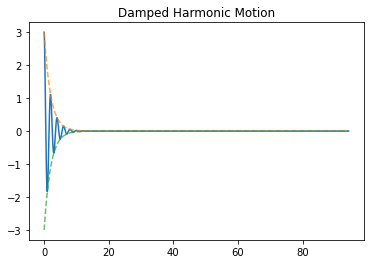

In [192]:
A = 3
m = 2
k = 20
b = 2

wprime = np.sqrt(k/m - (b**2)/(4*m**2))

xdamp = A*(np.e**((-b*t)/(2*m)))*np.cos(wprime*t)
plt.plot(t, xdamp)
plt.plot(t, A*(np.e**((-b*t)/(2*m))), '--', alpha=0.7)
plt.plot(t, -A*(np.e**((-b*t)/(2*m))), '--', alpha=0.7)
plt.title('Damped Harmonic Motion')
plt.show()

# Number Time
Suppose, instead, that we wished to find the solution to this differential equation numerically, using Euler's method.   
  
The equation $ma = -(bv + kx) = 0$ is a bit clearer to work with if we rewrite all terms relative to their power of $x(t)$, such that the equation becomes $mx'' = -(bx' + kx)$.  
  
From here, let us define an intermediate function:  
$y = x'$  
$y' = x''$  
$my' = -(by + kx)$.  

Focusing first on the relationship $y = x'$, we see that using a naive approximation, we reach $\frac{x(t+h) - x(t)}{h} \approx x'$, thus we perform the following steps: 
$y(t) = \frac{x(t+h) - x(t)}{h}$  
$hy(t) = x(t+h) - x(t)$  
$x(t+h) = hy(t) + x(t)$  
  
Similarly, examining the relationship $y' = x'', \frac{y(t+h) - y(t)}{h} \approx y'$ with the knowledge that $my' = -(by + kx)$ yields the relationships:  
$y' = \frac{-(by + kx)}{m}$  
  
$\frac{y(t+h) - y(t)}{h} = \frac{-(by + kx)}{m}$  

$y(t+h) - y(t) = \frac{-h(by + kx)}{m}$
  
$y(t+h) = \frac{-h(by + kx)}{m} + y(t)$  

Thus, given a starting value for $t, x(t), y(t)$, we can generate a table of values for $x(t)$ and $y(t)$ that approximates the values of the function that solves our differential equation.  

### Starting Values
Some reasonable starting values can be gleaned from the equation used to model undamped harmonic motion.  
Since our graph is still oscillating, our function $x(t)$ contains some form of either sin or cos. Since our mass is starting at the furthest possible distance from rest, we know that the term must be cos (sin(0) = 0, implies starting @ resting position). As such, the derivative of cos is -sin, and at $t = 0, -sin(0) = 0$, thus we may assume a starting value of $y(t) = 0$.  
  
By similar logic, we know from our simple harmonic motion graph that the furthest our mass ever gets from rest is at most $\pm A$. As such, we may set $x(0) = A$.  
Since we're beginning this function at the beginning of some interval of time, we may assume that, initially, $t = 0$.  
Finally, we need to define some step size, h, which represents how frequently we're updating our function. I'm choosing $h$ to be equal to the step size of t, as defined above.  
  
The graph of the resulting function is shown below, as well as a graph comparing our approximated solution function to the true solution function for this differential equation.

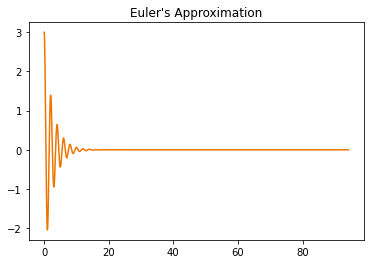

In [193]:
h = t[1]

xvals = [0]*len(t)
yvals = [0]*len(t)

xvals[0] = A # Values for x(t)
yvals[0] = 0 # Values for x'(t)

for time in range(len(t) - 1):
    xvals[time+1] = h*yvals[time] + xvals[time]
    yvals[time+1] = -h*(b*yvals[time] + k*xvals[time])/m + yvals[time]

plt.plot(t, xvals, '#EE7500')
plt.title('Euler\'s Approximation')
plt.show()

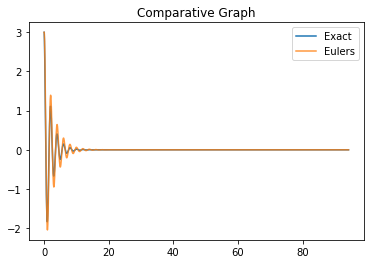

In [194]:
plt.plot(t, xdamp)
plt.plot(t, xvals, alpha=0.8)
plt.legend(['Exact', 'Eulers'])
plt.title('Comparative Graph')
plt.show()

As we can see, there is some error in our approximations.  
The values generated by Euler's method are shown in the table below, and the error is plotted in the graph below:

In [195]:
err = [0]*len(t)
maxerr = 0
print("{:<23} {:<27} {:<27} {:<25}".format('t', 'x(t)', 'y(t)', 'error'))
print('---------------------------------------------------------------------------------------------------------------')
for i in range(len(t)-1):
    err[i] = abs((xdamp[i] - xvals[i])/xdamp[i])
    print("{:<24}|   {:<24}|   {:<24}|   {:<24}".format(t[i], xvals[i], yvals[i], err[i]))
    if abs(err[i]) > maxerr:
        maxerr = abs(err[i])
print('\nMaximum error:', maxerr)

t                       x(t)                        y(t)                        error                    
---------------------------------------------------------------------------------------------------------------
0.0                     |   3                       |   0                       |   0.0                     
0.02356783686113873     |   3.0                     |   -0.707035105834162      |   0.01459969983287317     
0.04713567372227746     |   2.9833367119706025      |   -1.3974069236389264     |   0.029289124352605403    
0.0707035105834162      |   2.9504028535656546      |   -2.0675809945296706     |   0.0442008178652667      
0.09427134744455493     |   2.9016744419893885      |   -2.7141987142281394     |   0.05947808962923447     
0.11783918430569365     |   2.837706649483747       |   -3.334092820451915      |   0.07528222220737676     
0.1414070211668324      |   2.7591292938114425      |   -3.924301538527626      |   0.09180158214918464     
0.16497485802797113

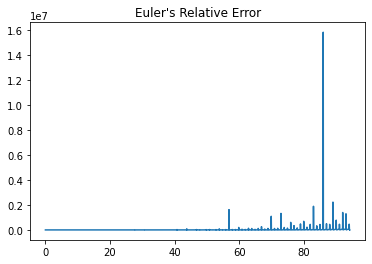

In [196]:
plt.plot(t, err)
plt.title('Euler\'s Relative Error')
plt.show()

# Euler's Relative Error
As we will see from the graph above and below, the error in Euler's method is entirely dependent on how long we attempt to approximate this function, as well as the tightness of the intervals that we decide to use.  
If we use small enough intervals of time, Euler's method actually improves the longer we use it, and the relative error shrinks down to zero, until we reach a point where the floating point arithmetic causes wild swings in our analysis.  
The graphs below illustrate the difference in error over time for different lengths & intervals of time:  

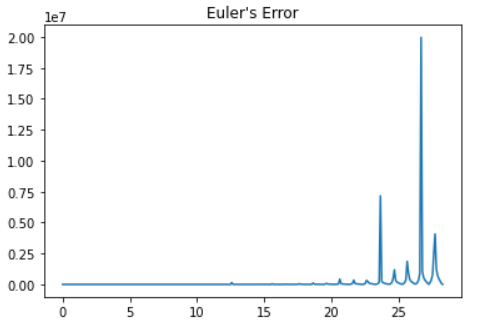 Euler's Error graph on [0, 3$\pi$], measured at 400 points. Note that this graph is uneven, with spikes of extremely high values. Compare it to the graph below, which used 80,000 points on the same interval:
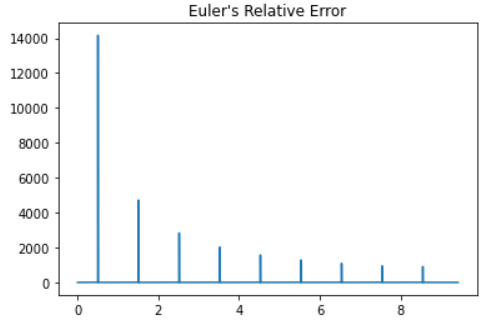 By using tighter spacing between our time intervals, we see that the error increases, and eventually, tends towards zero. The spikes in inaccuracy are immense, but for the most part, the error is otherwise relatively small.
  
The error trends and shifts are more easily seen when we examine a larger interval. See what happens when we increase the size of our overall window of measurement to [0, 30$\pi$], evaluating Euler's method evenly across 400 points:
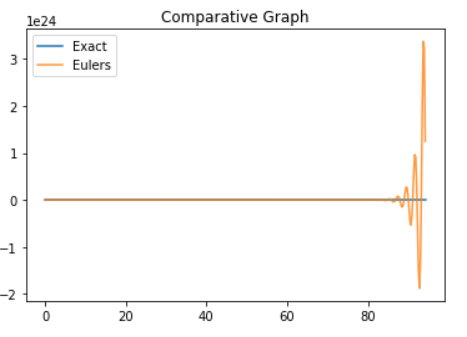  
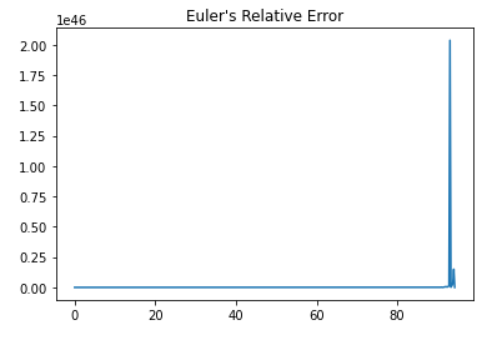

These graphs show the horrendous behavior of Euler's method when the distance between evlauation points is too large. Compare the above graphs to the following graphs of Euler's method on the same overall interval, but evaluated at 4,000 points instead:
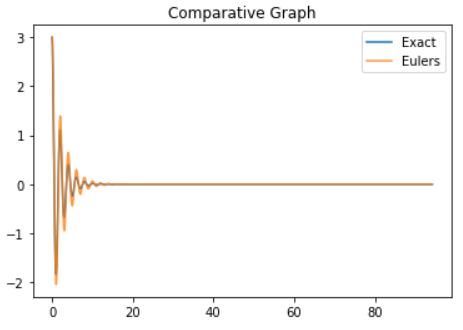
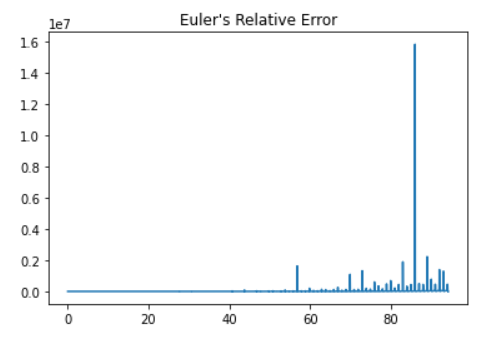
We still see spikes in the relative error around t$\approx$84, but I believe this is an instance of floating point arithmetic essentially bottoming out, and causing inaccuracies in the caluclations. As we can see from the comparative graph, increasing the 'density' of our evaluation points by a factor of 10 converted Euler's approximation from a gross and unusable function to one that we can use somewhat reliably.

# Sources / References
Wild SHM Video - https://www.youtube.com/watch?v=kLWXLbciobw  
Wicked Sick DHM Video - https://www.youtube.com/watch?v=qxDvW8_fm7I&ab_channel=AKLECTURES  
DHM Wikipedia - https://en.wikipedia.org/wiki/Complex_harmonic_motion  
Newton's Laws Wikipedia - https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion